**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [21]:
import pandas as pd
import numpy as np
from scipy import spatial as sp
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [22]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<AxesSubplot:title={'center':'Sales'}, ylabel='Frequency'>

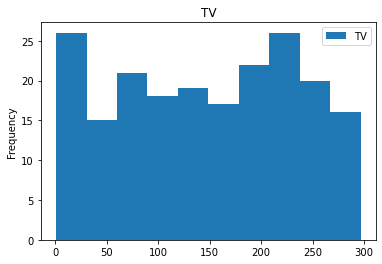

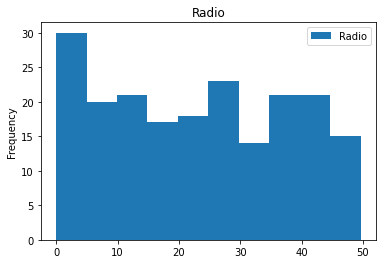

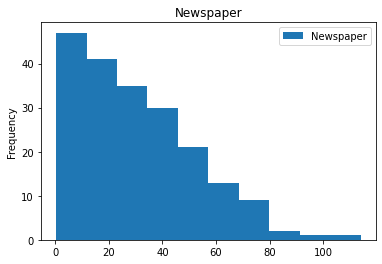

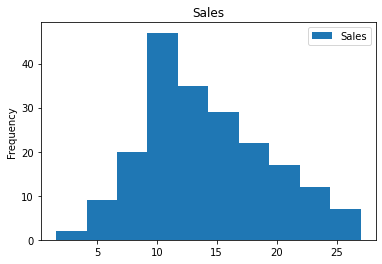

In [23]:
adver_data.plot(y='TV', kind='hist',  title='TV')
adver_data.plot(y='Radio', kind='hist',  title='Radio')
adver_data.plot(y='Newspaper', kind='hist',  title='Newspaper')
adver_data.plot(y='Sales', kind='hist',  title='Sales')

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [24]:
X = np.array([adver_data['TV'].values, adver_data['Radio'].values, adver_data['Newspaper'].values])
y = adver_data['Sales'].values
print(y.shape)

(200,)


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [25]:
means, stds = np.mean(X, axis=1), np.std(X, axis=1)
print(means)
print(stds)
print(means.shape)


[147.0425  23.264   30.554 ]
[85.63933176 14.80964564 21.72410606]
(3,)


In [26]:
X = np.array([(X[i] - means[i])/stds[i] for i in range(3)])        

    
    


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [27]:
one = np.ones(np.shape(X[0]))
X = np.hstack(X)
X = np.hstack((X, one))
X = X.reshape((4, len(X)//4))
X = X.T

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [28]:
def mserror(y, y_pred):
    return sum((y-y_pred)*(y-y_pred)) / len(y)
a = adver_data['Sales'][:30]
b = np.array([np.median(adver_data['Sales'])]*30)
print(mserror(a,b))

24.011


**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [29]:
answer1 = mserror(adver_data['Sales'], np.array([np.median(adver_data['Sales'])]*200))
print(round(answer1, 3))
print(adver_data['Sales'].shape)
print(np.array([np.median(adver_data['Sales'])]*200).shape)
#print(np.array([np.median(adver_data['Sales'])]*200))

28.346
(200,)
(200,)


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [30]:
def normal_equation(X, y):
    return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))


In [31]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)



[ 3.91925365  2.79206274 -0.02253861 14.0225    ]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [32]:
nmeans = np.array(np.mean(X, axis=0))
print(nmeans)
print(norm_eq_weights)
answer2 = np.dot(nmeans, norm_eq_weights)
print(answer2)
print(round(answer2, 3))



[ 1.22124533e-16 -4.52970994e-16  2.22044605e-16  1.00000000e+00]
[ 3.91925365  2.79206274 -0.02253861 14.0225    ]
14.022500000000003
14.023


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [33]:
def linear_prediction(X, w):
    return np.dot(X, w)
V = linear_prediction(X, norm_eq_weights)
print(X.shape, norm_eq_weights.shape)
print(V.shape)
print(norm_eq_weights.shape)

(200, 4) (4,)
(200,)
(4,)


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [34]:
answer3 = mserror(y, V)
print(answer3)
print(type(answer3))
#print(round(answer3, 3))
print(X.shape)
print(y.shape, V.shape)
ycopy = y
Vcopy = V
ycopy = ycopy.reshape(200,1)
Vcopy = Vcopy.reshape(200,1)
print(mserror(ycopy, Vcopy))

2.784126314510936
<class 'numpy.float64'>
(200, 4)
(200,) (200,)
2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [224]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    #return  w - (2 * eta / len(y)) * X[train_ind] * (X[train_ind] * w - y[train_ind]) 
    grad0 = X[train_ind][0]*(X[train_ind].dot(w) - y[train_ind])
    grad1 = X[train_ind][1]*(X[train_ind].dot(w) - y[train_ind])
    grad2 = X[train_ind][2]*(X[train_ind].dot(w) - y[train_ind])
    grad3 = X[train_ind][3]*(X[train_ind].dot(w) - y[train_ind])
    return  w - (2 * eta / len(y)) * np.array([grad0, grad1, grad2, grad3])

print(stochastic_gradient_step(X, y, norm_eq_weights, 1, eta=0.01).shape)

(4,)


**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [225]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
    dists = []    
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        w_new = stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = sp.distance.euclidean(w, w_new)
        dists.append(weight_dist)
        
        y_predict = linear_prediction(X, w_new)
        err = mserror(y, y_predict)
        errors.append(err)
        w = w_new
        iter_num += 1
        
        
    return w, errors, dists
print(linear_prediction(X, norm_eq_weights).shape)
print(y.shape)
print(X[1].shape)

(200,)
(200,)
(4,)


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [226]:
%%time
w_init = np.array([0, 0, 0, 0])
w_init = w_init.reshape(4,)
#Z = X[:10]
#print(Z)
stoch_grad_desc_weights, stoch_errors_by_iter, w_dists = stochastic_gradient_descent(X, y, w_init, eta=0.01, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=True)
#print(stoch_grad_desc_weights, stoch_errors_by_iter)

Wall time: 3.5 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

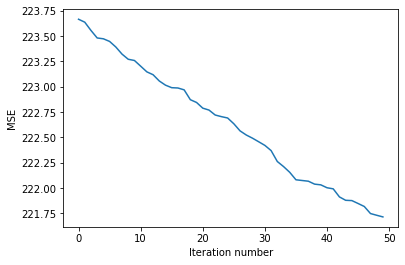

In [227]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')


**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

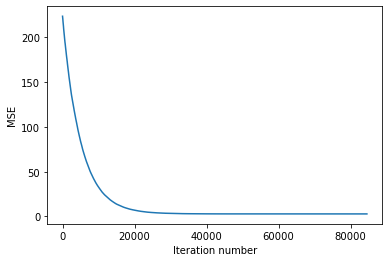

In [233]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')


**Посмотрим на вектор весов, к которому сошелся метод.**

In [234]:
stoch_grad_desc_weights

array([ 3.91069256e+00,  2.78209808e+00, -8.10462217e-03,  1.40190566e+01])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [235]:
stoch_errors_by_iter[-1]

2.7844125884067044

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [236]:
answer4 = stoch_errors_by_iter[-1]
print(round(answer4, 3))

2.784


Populating the interactive namespace from numpy and matplotlib
5.0536343368235184e-09


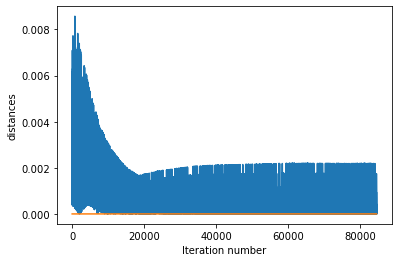

In [237]:
%pylab inline
plot(range(len(w_dists)), w_dists)
plot(range(len(w_dists)), [1e-8]*(len(w_dists)))
xlabel('Iteration number')
ylabel('distances')
print(np.min(w_dists))